![](./Resources/ai-sk-add-wechat.png)

# Semantic Kernel 借助 OneApi 对接流行大模型

上一节中介绍了如何通过合理抽象实现灵活切换兼容OpenAI API格式的大模型。但是仍旧有一些大模型是不兼容的，那Semantic Kernel 该如何接入呢？这一节我们就来具体介绍如何基于OpenAI 代理（OneAPI)来实现对接。

## What's OneApi?
> [OneApi](https://github.com/songquanpeng/one-api) 是一个GitHub 开源项目，帮助开发者通过标准的 OpenAI API 格式访问所有的大模型。(https://github.com/songquanpeng/one-api)

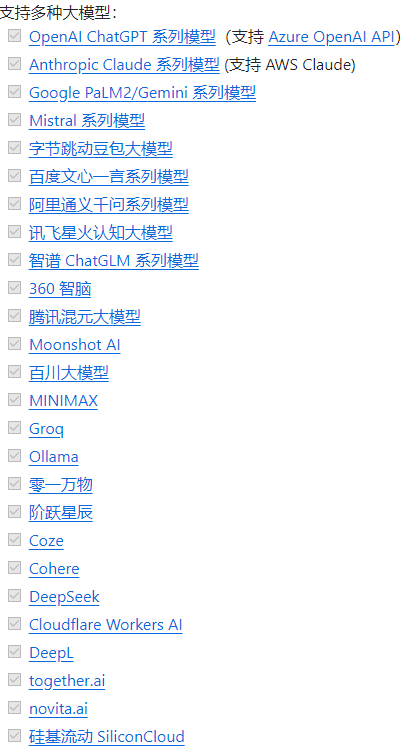

借助OneApi，开发者可以忽略模型间的API 差异，通过统一的OpenAI的格式，实现对各大模型的透明调用。
对于开发者而言，仅需要将 OpenAI 的网址改成你部署的 One API 系统的网址、将 OpenAI 的 API Key 改成你的令牌即可。One API 将代理用户向实际的大模型发出请求并接收响应，如下图所示：

In [1]:
graph LR
    A(用户)
    A --->|使用 One API 分发的 key 进行请求| B(One API)
    B -->|中继请求| C(OpenAI)
    B -->|中继请求| D(Azure)
    B -->|中继请求| E(其他 OpenAI API 格式下游渠道)
    B -->|中继并修改请求体和返回体| F(非 OpenAI API 格式下游渠道)

## 使用Docker安装 OneApi

使用SQLite部署：
```
docker run --name one-api -d --restart always \
-p 3000:3000 -e TZ=Asia/Shanghai \
-v /home/data/one-api:/data justsong/one-api
```

部署成功后， 使用`docker ps | grep one-api` 进行确认：
```
$ docker ps | grep one-api
12f025568eab   justsong/one-api   "/one-api"   3 minutes ago   Up 3 minutes   0.0.0.0:3000->3000/tcp   one-api
```

然后直接访问 http://localhost:3000/ 即可打开 One Api 管理界面，默认用户名密码是：`root/123456`。登录后页面如下所示：

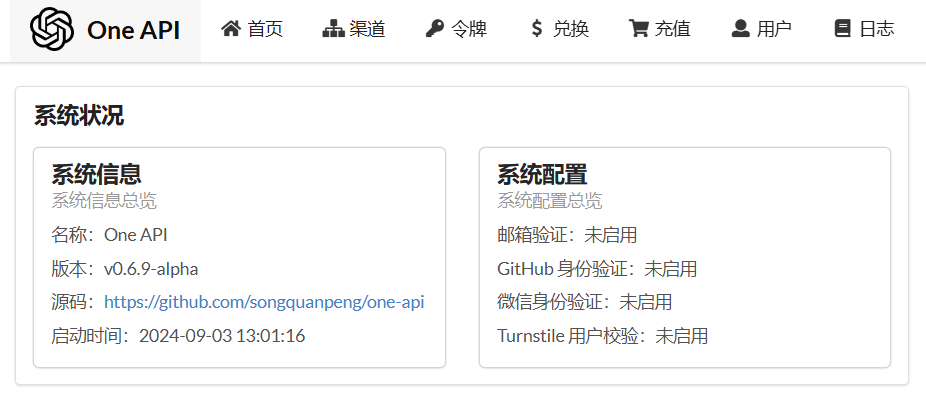

## 绑定渠道
One Api 将AI 服务提供商抽象为了渠道，下图分别举例如何分别绑定智谱和月之暗面：

1. 绑定智谱 AI

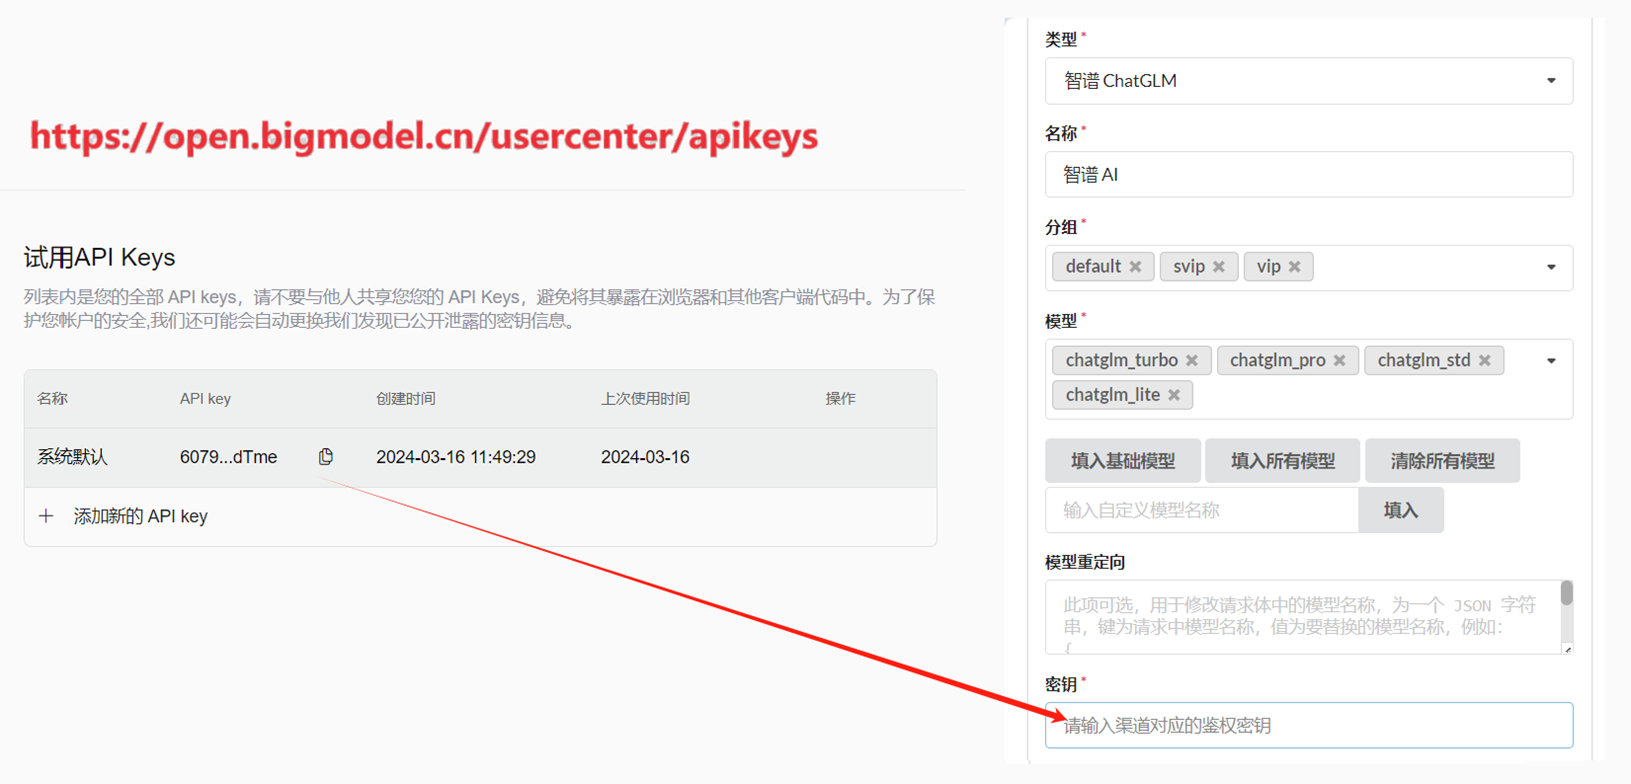

2. 绑定讯飞星火

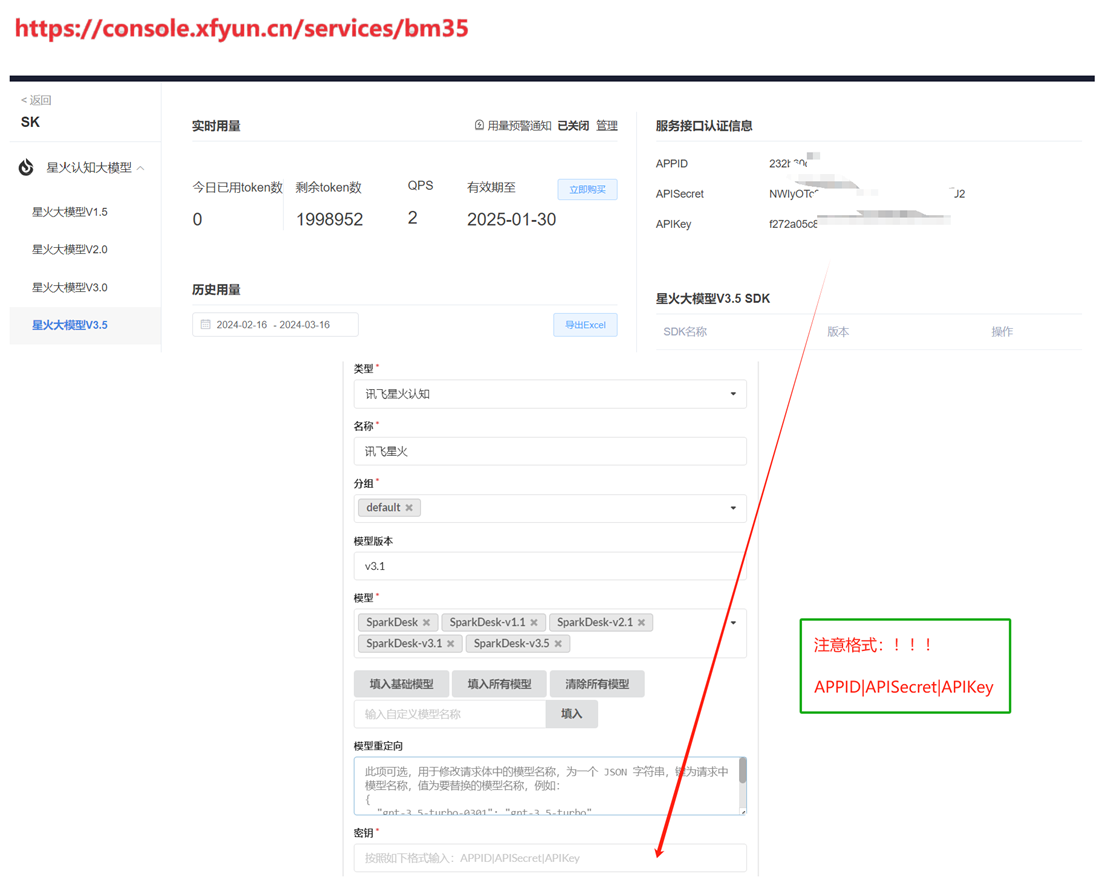

## 配置令牌
依次点击菜单：令牌-> 添加新的令牌，按需填写需要的信息即可。
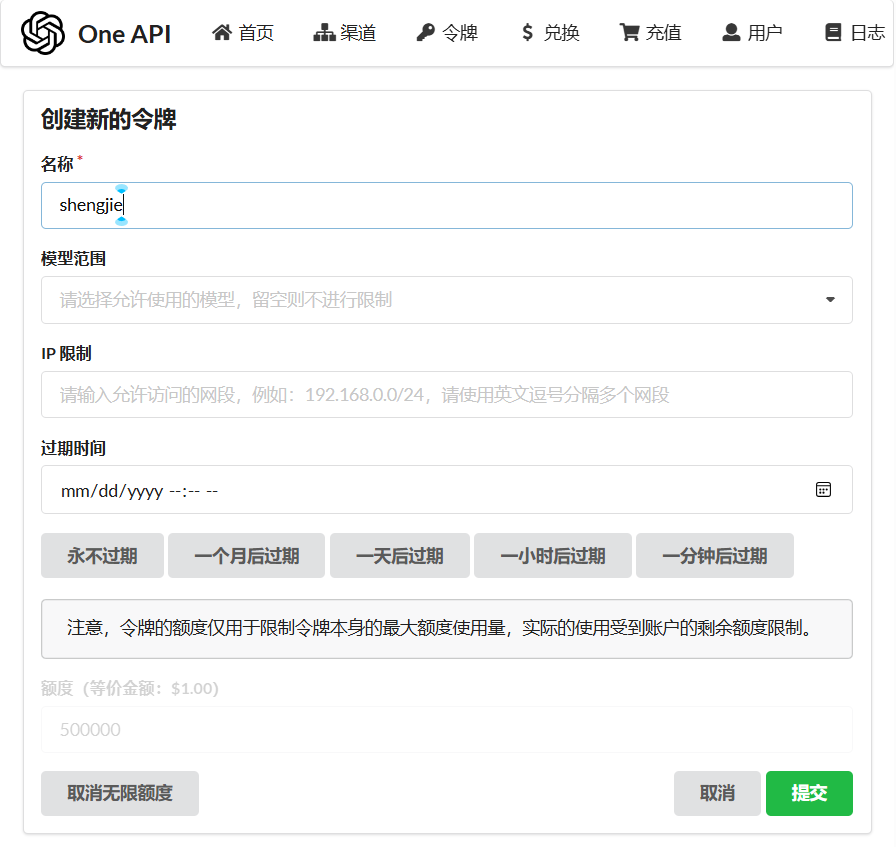
添加成功后，会显示已创建的令牌列表，点击复制按钮即可复制令牌（即Api Key）。

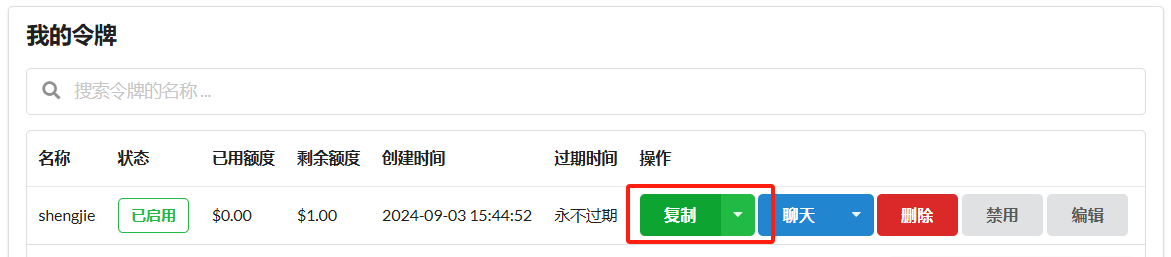

## 测试 OneApi
使用以下代码进行测试即可。测试成功后，会在One Api的管理界面的日志页面显示具体的调用记录，如下图所示：
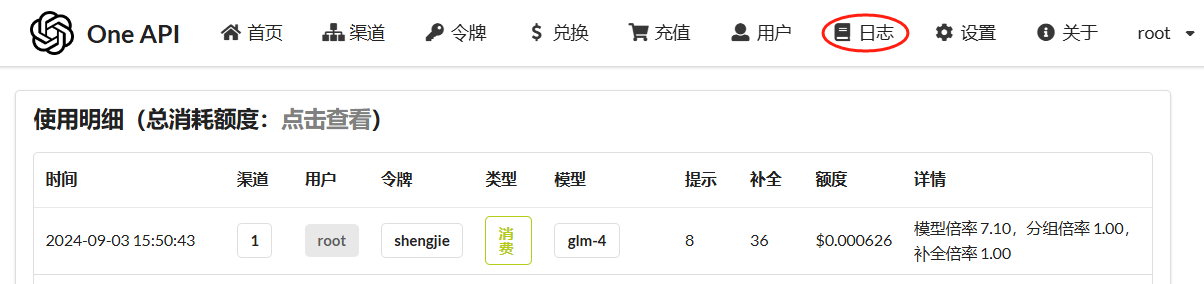

In [13]:
#r "nuget: Microsoft.SemanticKernel"

Installed Packages Microsoft.SemanticKernel, 1.25.0

In [16]:
#pragma warning disable SKEXP0010

using Microsoft.SemanticKernel;
using Microsoft.SemanticKernel.ChatCompletion;
using Microsoft.SemanticKernel.Connectors.OpenAI;
using Microsoft.Extensions.DependencyInjection;

// 引入交互式的内核命名空间，以便用户输入
using PolyglotKernel= Microsoft.DotNet.Interactive.Kernel;

// var oneApiKey = await PolyglotKernel.GetInputAsync("请输入您的OneAPI Key："); 
var oneApiKey = "sk-9y9939P3ufwHaltcB95d91F3D9D64303Ad799e991f4700F1";

// Create kernel builder
var builder = Kernel.CreateBuilder();

var oneApiEndpoint = new Uri("http://localhost:3000/v1");
// Add OpenAI Chat completion
builder.AddOpenAIChatCompletion(
    modelId: "lite", 
    apiKey: oneApiKey,
    endpoint: oneApiEndpoint);
// Build kernel
var kernel = builder.Build();

var response = await kernel.InvokePromptAsync("介绍下OneApi的使用场景和优势");
response.Display();

OneAPI是一种通用设备编程框架，相比传统的编程方法有许多优势。以下是OneAPI的优势:\n- 跨平台支持和兼容性\n- 提高开发效率和加速应用部署\n- 统一编程模型和简化维护 Function InvokePromptAsync_f7ed1ba529754b7bbc0f6c27e15f30ba Name InvokePromptAsync_f7ed1ba529754b7bbc0f6c27e15f30ba PluginName <null> Description Generic function, unknown purpose Metadata Microsoft.SemanticKernel.KernelFunctionMetadata Name InvokePromptAsync_f7ed1ba529754b7bbc0f6c27e15f30ba PluginName <null> Description Generic function, unknown purpose Parameters (empty) ReturnParameter Microsoft.SemanticKernel.KernelReturnParameterMetadata Description ParameterType <null> Schema <null> AdditionalProperties (empty) ExecutionSettings (empty) Metadata key type value Id System.String chatcmpl-cb5f8a349f1b4157a2c539d8e415fef3 CreatedAt System.DateTimeOffset 2024-10-30 12:25:58Z SystemFingerprint <null> <null> Usage OpenAI.Chat.ChatTokenUsage OpenAI.Chat.ChatTokenUsage OutputTokenCount 53 InputTokenCount 40 TotalTokenCount 93 OutputTokenDetails <null> Refusal <null> <null> FinishReason System.String Stop ContentTokenLogProbabilities OpenAI.ChangeTrackingList<OpenAI.Chat.ChatTokenLogProbabilityDetails> Culture Parent Parent Parent Parent Parent LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - TextInfo TextInfo - IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo DateTimeFormat System.Globalization.DateTimeFormatInfo Calendar System.Globalization.GregorianCalendar OptionalCalendars [ System.Globalization.GregorianCalendar ] UseUserOverride False IsReadOnly True LCID 127 KeyboardLayoutId 127 Name IetfLanguageTag DisplayName Invariant Language (Invariant Country) NativeName Invariant Language (Invariant Country) EnglishName Invariant Language (Invariant Country) TwoLetterISOLanguageName iv ThreeLetterISOLanguageName ivl ThreeLetterWindowsLanguageName IVL CompareInfo CompareInfo - Name Version System.Globalization.SortVersion LCID 127 TextInfo TextInfo - ANSICodePage 1252 OEMCodePage 437 MacCodePage 10000 EBCDICCodePage 37 LCID 127 CultureName IsReadOnly True ListSeparator , IsRightToLeft False IsNeutralCulture False CultureTypes SpecificCultures, InstalledWin32Cultures NumberFormat System.Globalization.NumberFormatInfo CurrencyDecimalDigits 2 CurrencyDecimalSeparator . IsReadOnly True CurrencyGroupSizes [ 3 ] NumberGroupSizes [ 3 ] PercentGroupSizes [ 3 ] CurrencyGroupSeparator , CurrencySymbol ¤ NaNSymbol NaN CurrencyNegativePattern 0 NumberNegativePattern 1 PercentPositivePattern 0 PercentNegativePattern 0 NegativeInfinitySymbol -Infinity NegativeSign - NumberDecimalDigits 2 NumberDecimalSeparator . NumberGroupSeparator , CurrencyPositivePattern 0 PositiveInfinitySymbol Infinity PositiveSign + PercentDecimalDigits 2 PercentDecimalSeparator . PercentGroupSeparator , PercentSymbol % PerMilleSymbol ‰ NativeDigits [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ] DigitSubstitution None DateTimeFormat System.Globalization.DateTimeFormatInfo AMDesignator AM Calendar System.Globalization.GregorianCalendar DateSeparator / FirstDayOfWeek Sunday CalendarWeekRule FirstDay FullDateTimePattern dddd, dd MMMM yyyy HH:mm:ss LongDatePattern dddd, dd MMMM yyyy LongTimePattern HH:mm:ss MonthDayPattern MMMM dd PMDesignator PM RFC1123Pattern ddd, dd MMM yyyy HH':'mm':'ss 'GMT' ShortDatePattern MM/dd/yyyy ShortTimePattern HH:mm SortableDateTimePattern yyyy'-'MM'-'dd'T'HH':'mm':'ss TimeSeparator : UniversalSortableDateTimePattern yyyy'-'MM'-'dd HH':'mm':'ss'Z' YearMonthPattern yyyy MMMM AbbreviatedDayNames [ Sun, Mon, Tue, Wed, Thu, Fri, Sat ] ShortestDayNames [ Su, Mo, Tu, We, Th, Fr, Sa ] DayNames [ Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday ] AbbreviatedMonthNames [ Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct